# CASO INTEGRADOR: BLACK FRIDAY

In [1]:
import pandas as pd
import numpy as np

In [2]:
BlackFriday= pd.read_csv("Data/BlackFriday.csv")
BlackFriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
BlackFriday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [4]:
BlackFriday.shape

(550068, 12)

In [5]:
BlackFriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
BlackFriday.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [7]:
# Resumen de estadística descriptiva:

BlackFriday['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

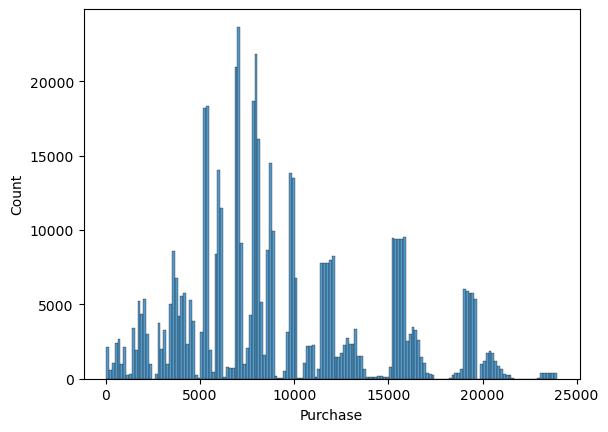

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Histograma con seaborn:

sns.histplot(BlackFriday['Purchase'])
plt.show()

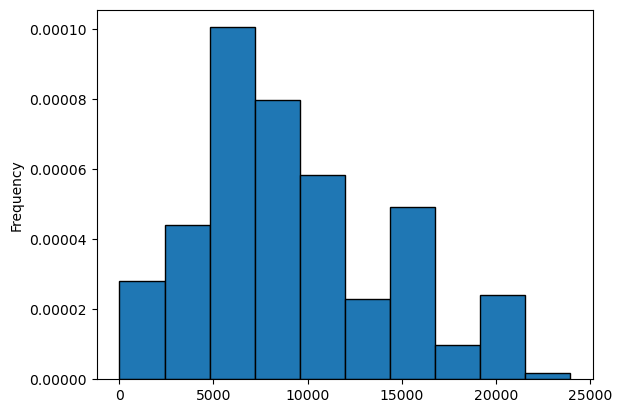

In [9]:
BlackFriday['Purchase'].plot(kind='hist',density=True, edgecolor = 'k')
plt.show()

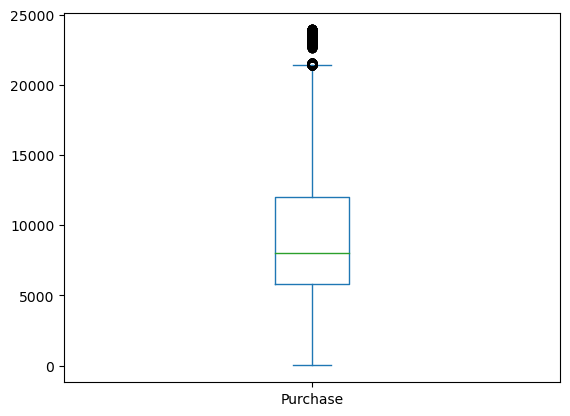

In [10]:
# Diagrama de cajas:

BlackFriday['Purchase'].plot(kind='box')
plt.show()

# A simple vista se pueden apreciar:

Una desviación con respecto a la distribución normal.
Una asimetría positiva.
Algunos picos.
Varios posibles datos atípicos.

In [11]:
# Rango intercuartílico y Coeficiente de variación:me permiten cuantificar la amplitud de los datos

interquantile = lambda x: x.quantile(0.75)-x.quantile(0.25)
cv = lambda x: x.std()/x.mean()

f = {'Purchase' : [interquantile, cv]}
BlackFriday.agg(f)

,Purchase
<lambda>,6231.000000
<lambda>,0.542215


como el coeficiente de variacion es < 0.5, siginifica que la variable Purchase no esta tan disperso, podemos ver que el c.v. esta en el limite y podemos considerar que no esta tan disperso.

Revisando las variables explicactivas cuantitativas:

In [12]:
# extraemos las variables cuantitativas, quitando las variables Id
list(BlackFriday.describe().columns)

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

In [13]:
# describe solo sirve en un dataframe para variables cuantitantiva 
# si se usa en una cualitativa de manera directa, saca una tabla de frecuencia

lista_cuantitativas = list(BlackFriday.describe().columns)
lista_cuantitativas

['User_ID',
 'Occupation',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase']

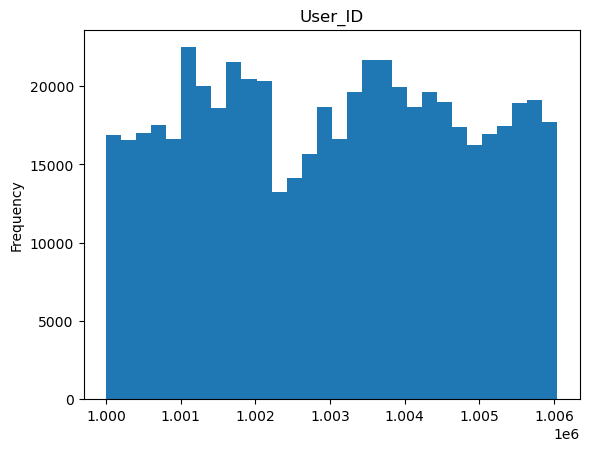

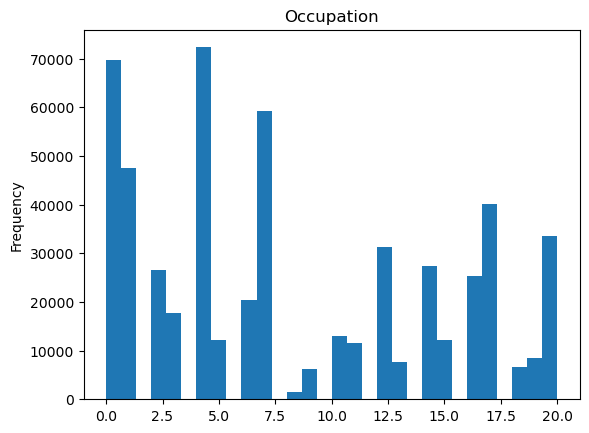

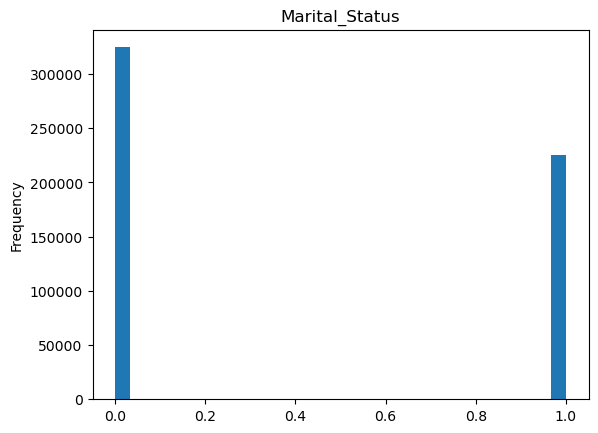

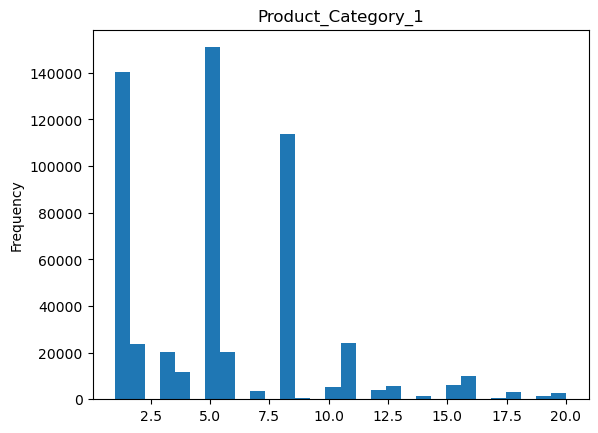

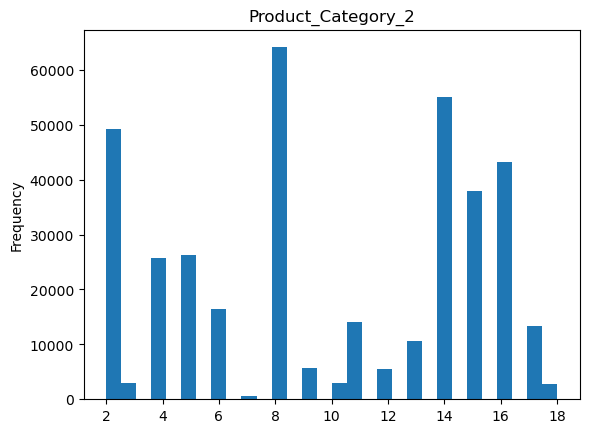

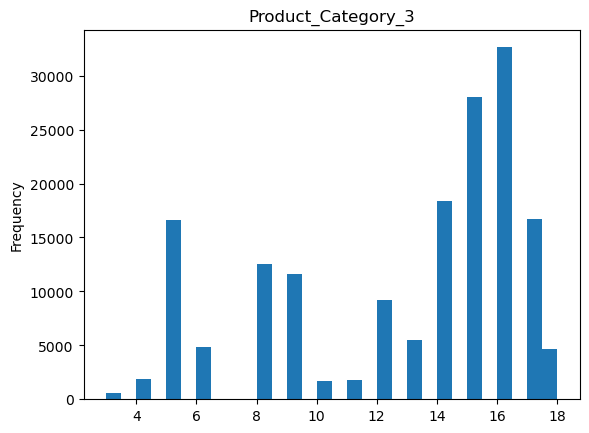

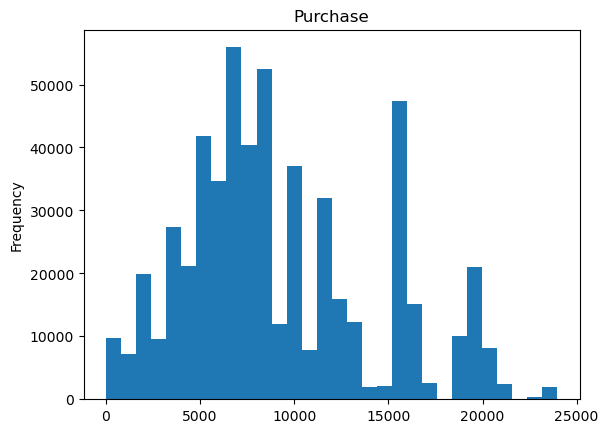

In [14]:
# realizamos histogramas para revisar la distribución de cada variable cuantitativa
for var in lista_cuantitativas:
    BlackFriday[var].plot(kind='hist', title=var, bins=30)
    plt.show()

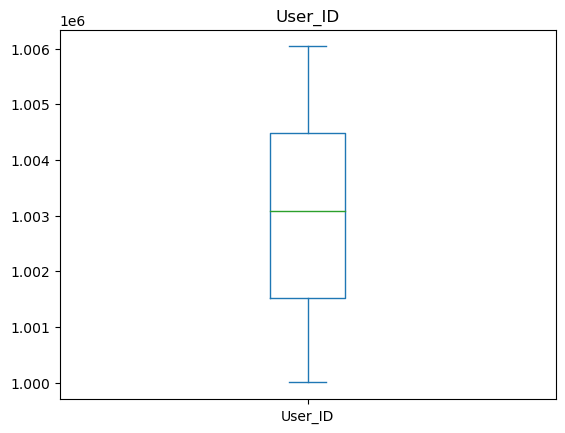

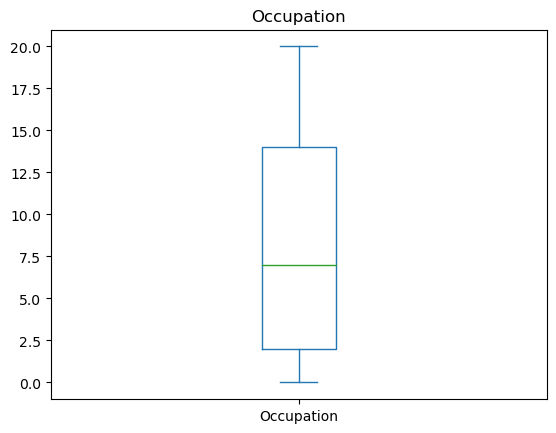

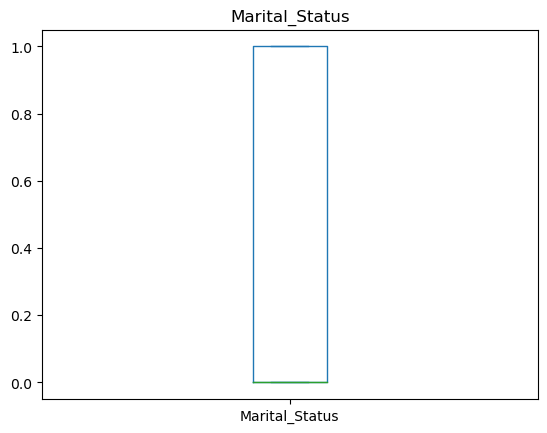

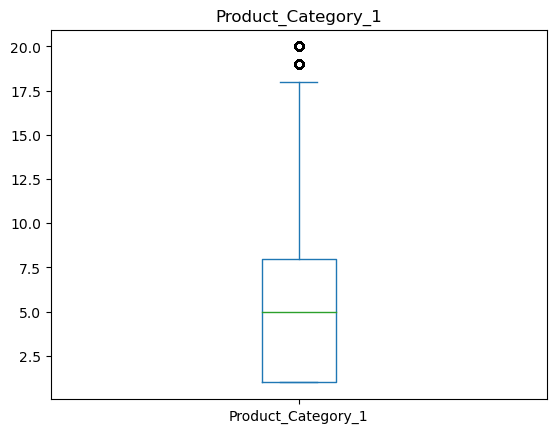

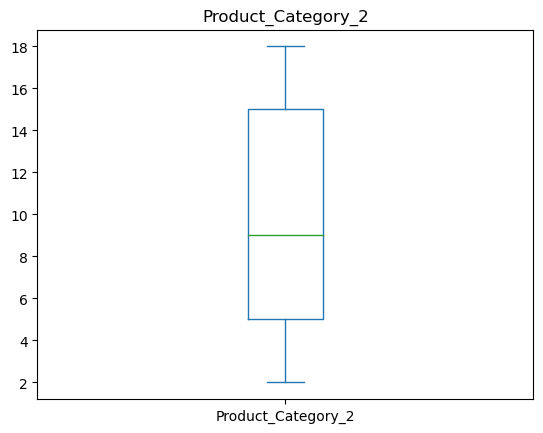

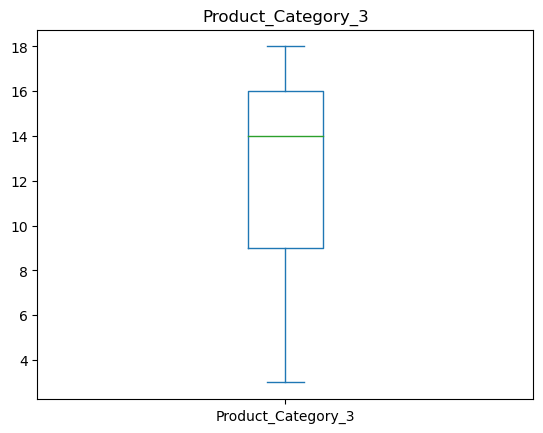

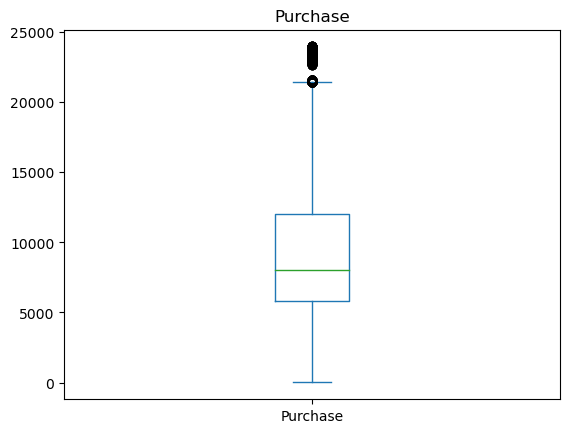

In [15]:
# realizamos diagramas de cajas para revisar la distribución de cada variable cuantitativa
for var in lista_cuantitativas:
    BlackFriday[var].plot(kind='box', title=var)
    plt.show()

Revisando las variables explicactivas cualitativas:

In [16]:
# extraemos las listas de cuantitativas
lista_cuantitativas = list(BlackFriday.describe().columns)

#ahora en la base total quitamos estas variables, quedandonos con las cualitativas
lista_cualitativas = BlackFriday.drop(columns = lista_cuantitativas).columns
lista_cualitativas

Index(['Product_ID', 'Gender', 'Age', 'City_Category',
       'Stay_In_Current_City_Years'],
      dtype='object')

In [17]:
BlackFriday[lista_cualitativas]

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+
...,...,...,...,...,...
550063,P00372445,M,51-55,B,1
550064,P00375436,F,26-35,C,3
550065,P00375436,F,26-35,B,4+
550066,P00375436,F,55+,C,2


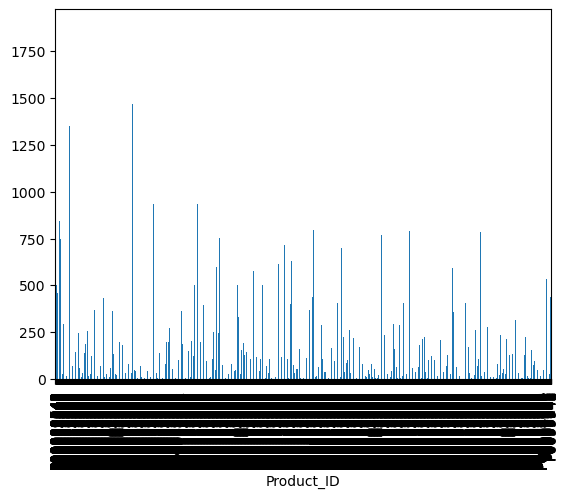

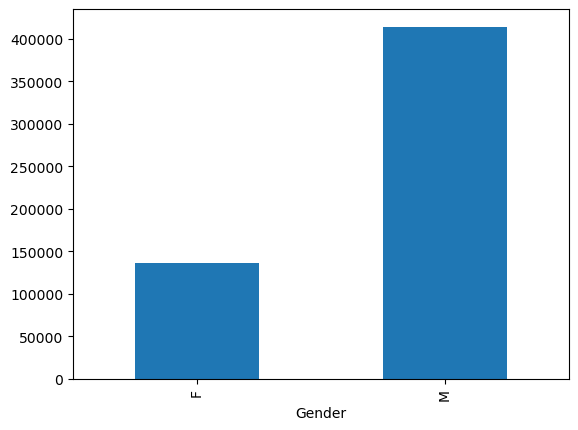

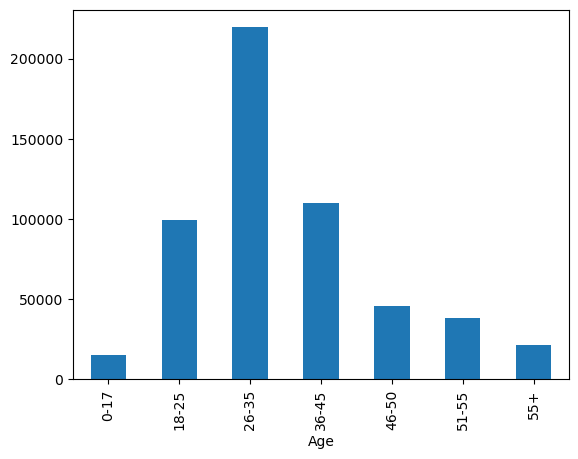

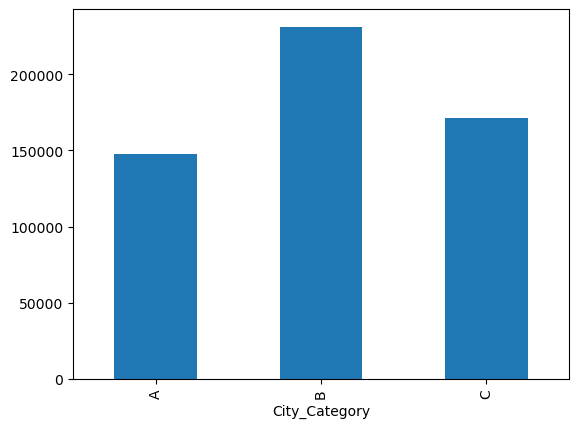

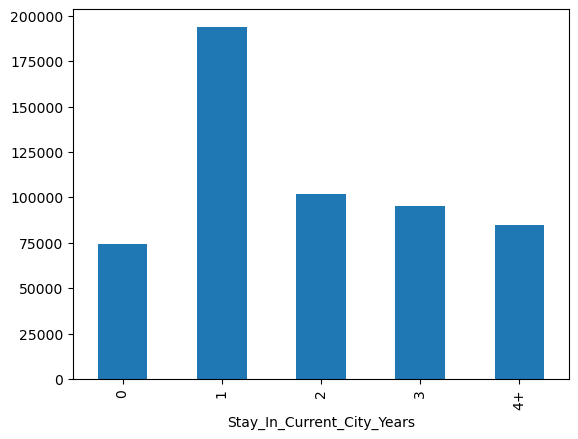

In [18]:
# realizamos diagramas de barras para revisar la distribución de frecuencias de cada variable cualitativa
for var in lista_cualitativas:
    BlackFriday.groupby(var)['Purchase'].count().plot.bar()
    plt.show()

En este punto debemos revisar las variables que sólo tengan una categoría relevante y cuestionar si dejarlas o no para continuar nuestros análisis.

[[1.         0.00471566]
 [0.00471566 1.        ]]


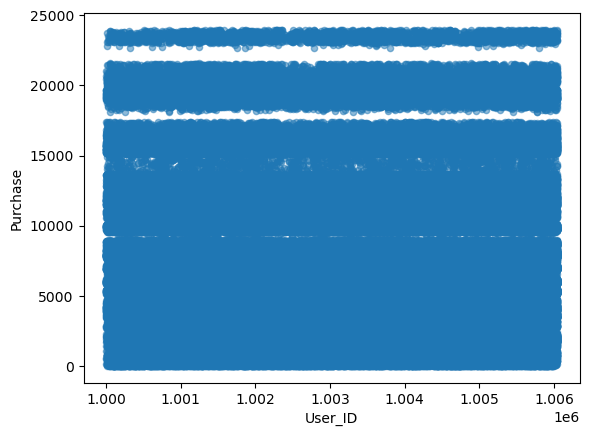

[[1.         0.02083262]
 [0.02083262 1.        ]]


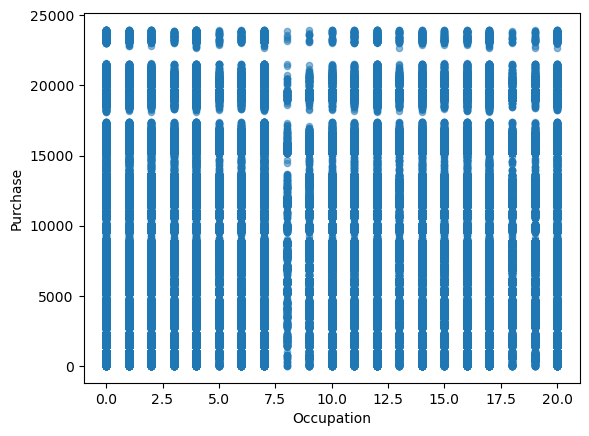

[[ 1.0000000e+00 -4.6337642e-04]
 [-4.6337642e-04  1.0000000e+00]]


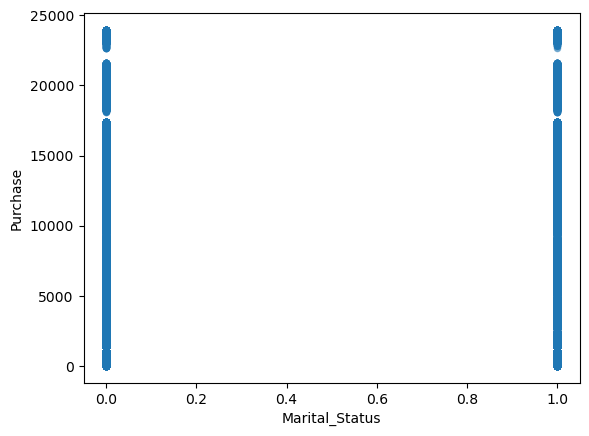

[[ 1.         -0.34370335]
 [-0.34370335  1.        ]]


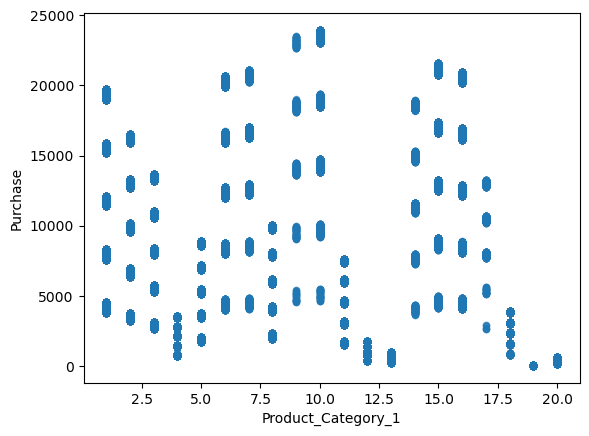

[[ 1. nan]
 [nan nan]]


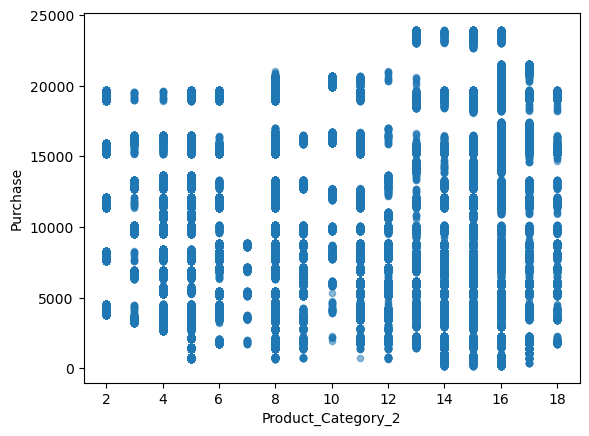

[[ 1. nan]
 [nan nan]]


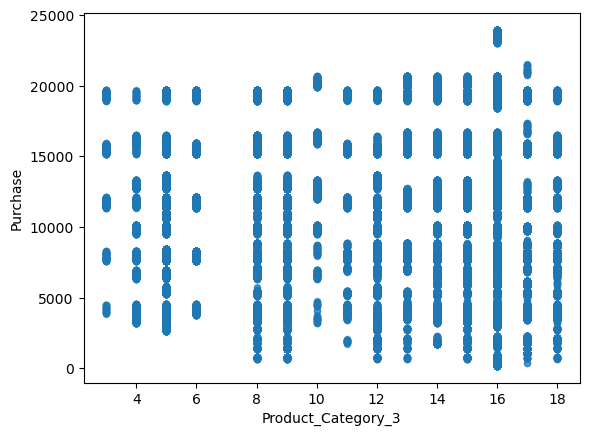

[[1. 1.]
 [1. 1.]]


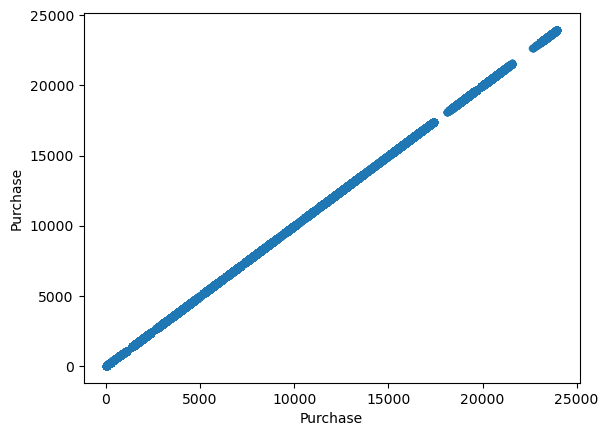

In [19]:
# Diagrama de dispersión cada variable con la variable objetivo (Purchase):
import numpy as np

lista_cuantitativas = list(BlackFriday.describe().columns)
for var in lista_cuantitativas:
    print(np.corrcoef(BlackFriday['Purchase'], BlackFriday[var]))
    data = pd.concat([BlackFriday['Purchase'], BlackFriday[var]], axis=1)
    data.plot.scatter(x=var, y='Purchase', alpha = 0.5)
    plt.show()

¿Qué podemos ver en estos gráficos?

Relaciones entre la variable cuantitativa de interés con cada una de las demás, además de su coeficiente de correlación.
Si hay variables relacionadas donde haya sesgo con alguno de los extremos, lo que podría lllevar a eliminarla.
Eliminar variables poco correlacionadas para descartarlas.

Relación de variables cuantitativas con variables categóricas.
Sirve para variables Target u objetivo cuantitativas y cualitativa

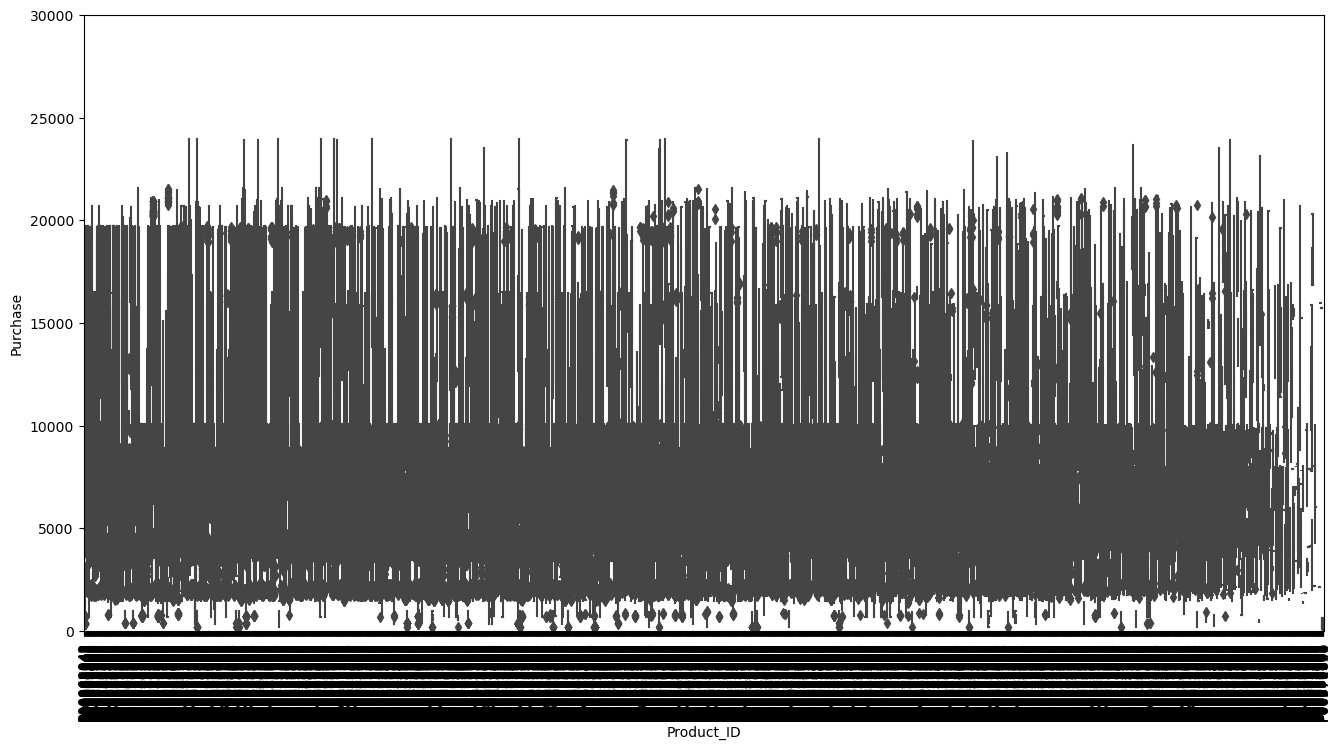

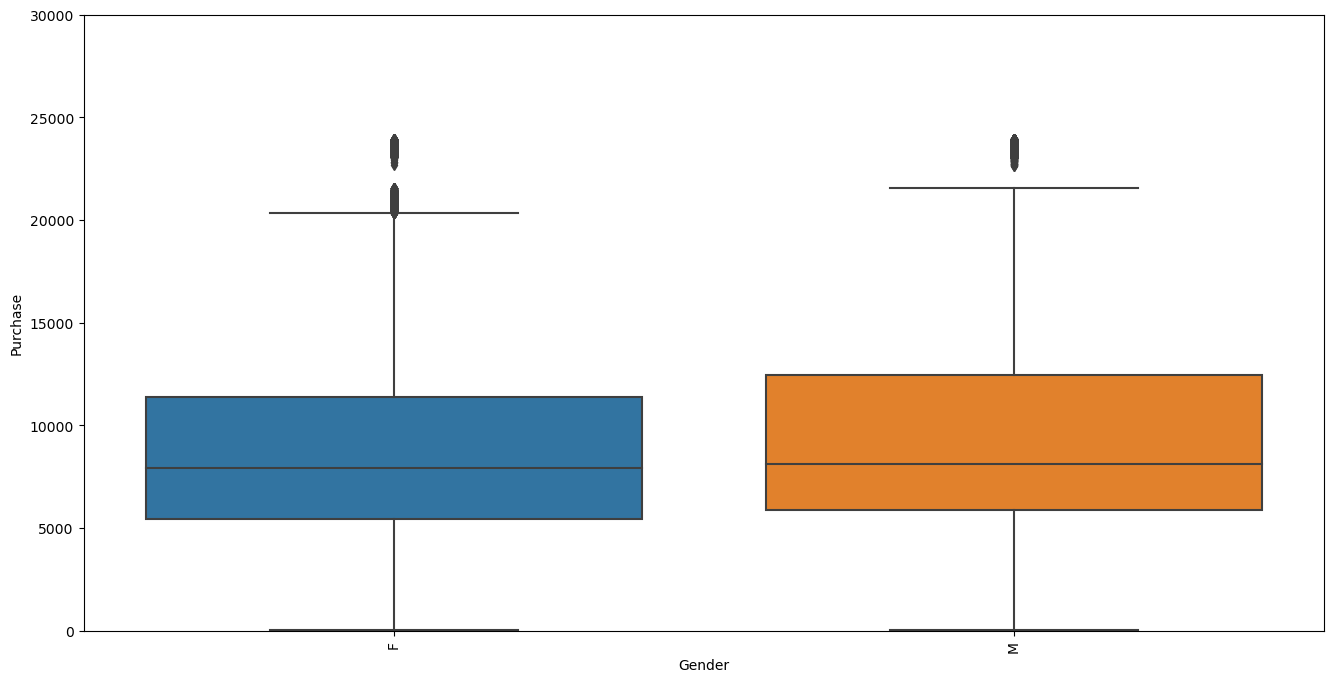

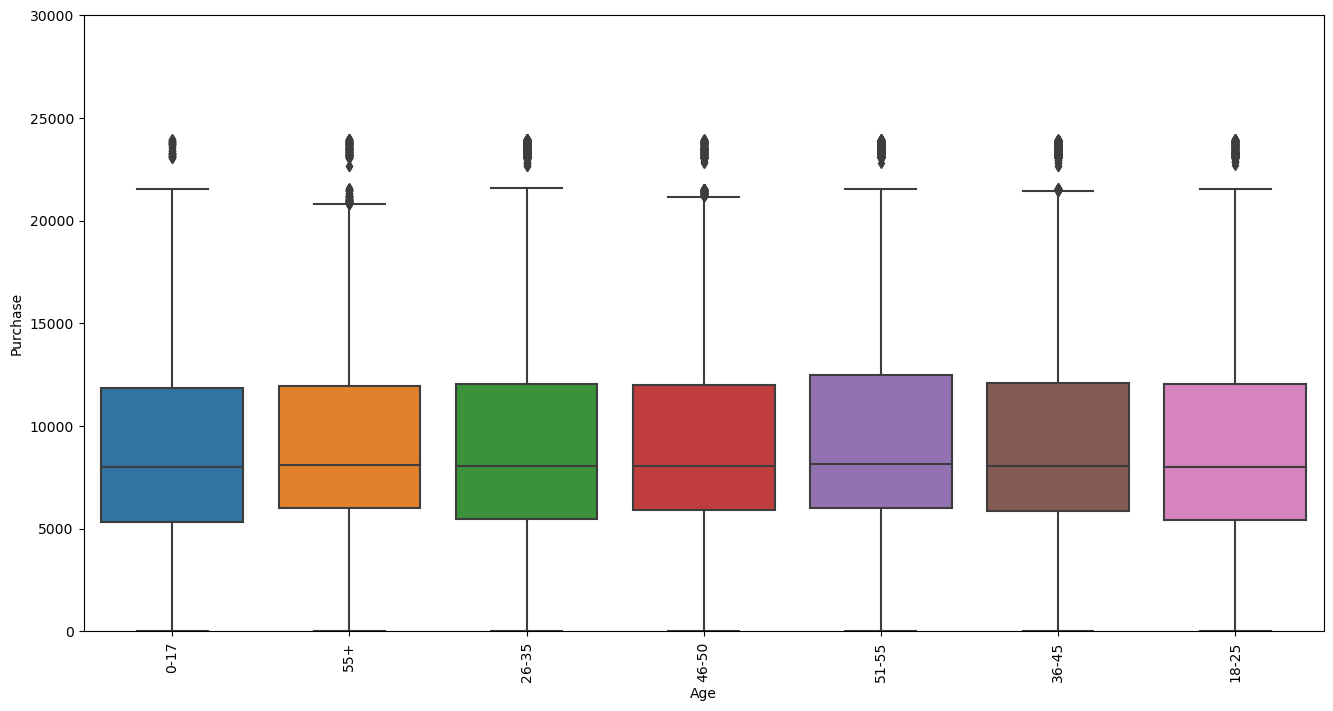

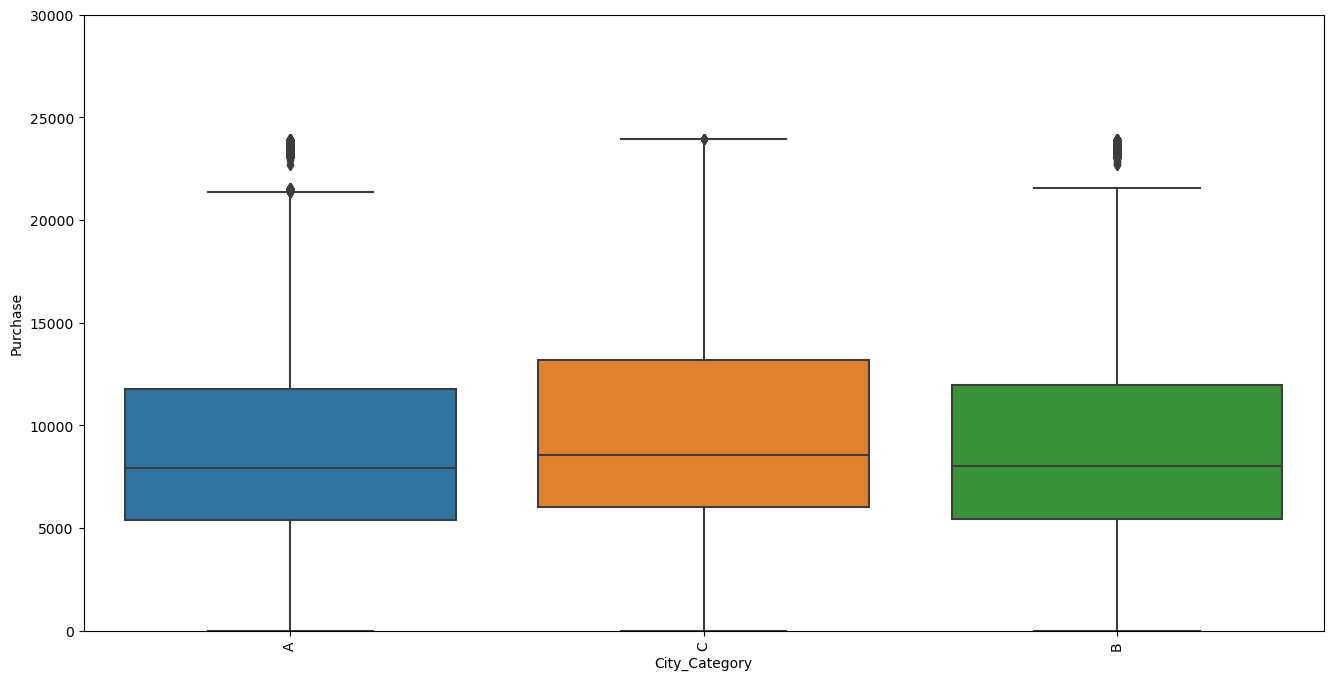

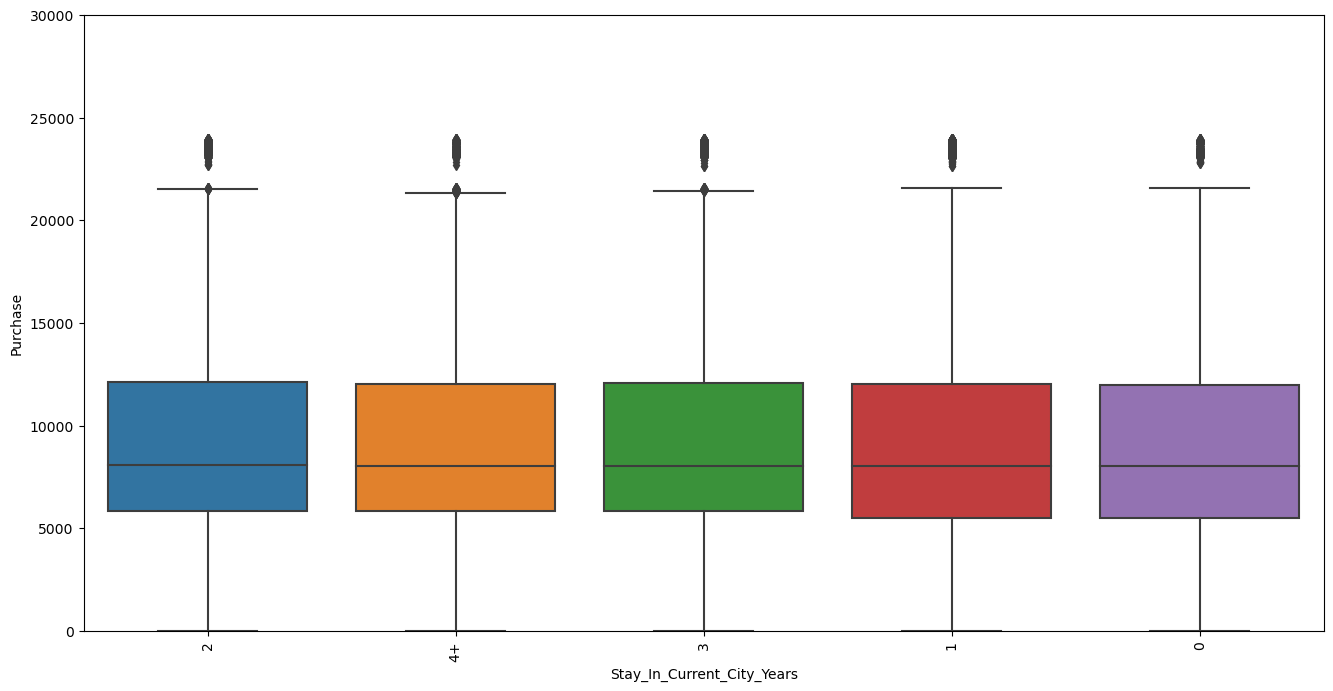

In [20]:
for var in lista_cualitativas:
    data = pd.concat([BlackFriday['Purchase'], BlackFriday[var]], axis=1)
    f, ax = plt.subplots(figsize=(16, 8))
    fig = sns.boxplot(x=var, y="Purchase", data=data)
    fig.axis(ymin=0, ymax=30000)
    plt.xticks(rotation=90)
    plt.show()

Resumiendo:
Ninguna variable cualitativa mantiene una relación con 'Purchase', dado que ninguna sobrepasa el 0.5.
'Gender' y 'City_Category' parecen relacionadas con 'Purchase', tal y como se puede observar en los diagramas de cajas.

# ETAPA 4: Asociaciones Cualitativas y Cuantitativas

## Análisis multivariado

Para poder obtener un análisis mas objetivo se requiere poder realizar las siguientes pruebas de correlación:

- Matriz de correlación general.
- Matriz de correlación centrada en la variable 'SalePrice'.
- Diagramas de dispersión entre las variables más correladas.

Matriz de correlación (en forma de mapa de calor)

C:\Users\sauls\AppData\Local\Temp\ipykernel_18484\2607397751.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = BlackFriday.corr()


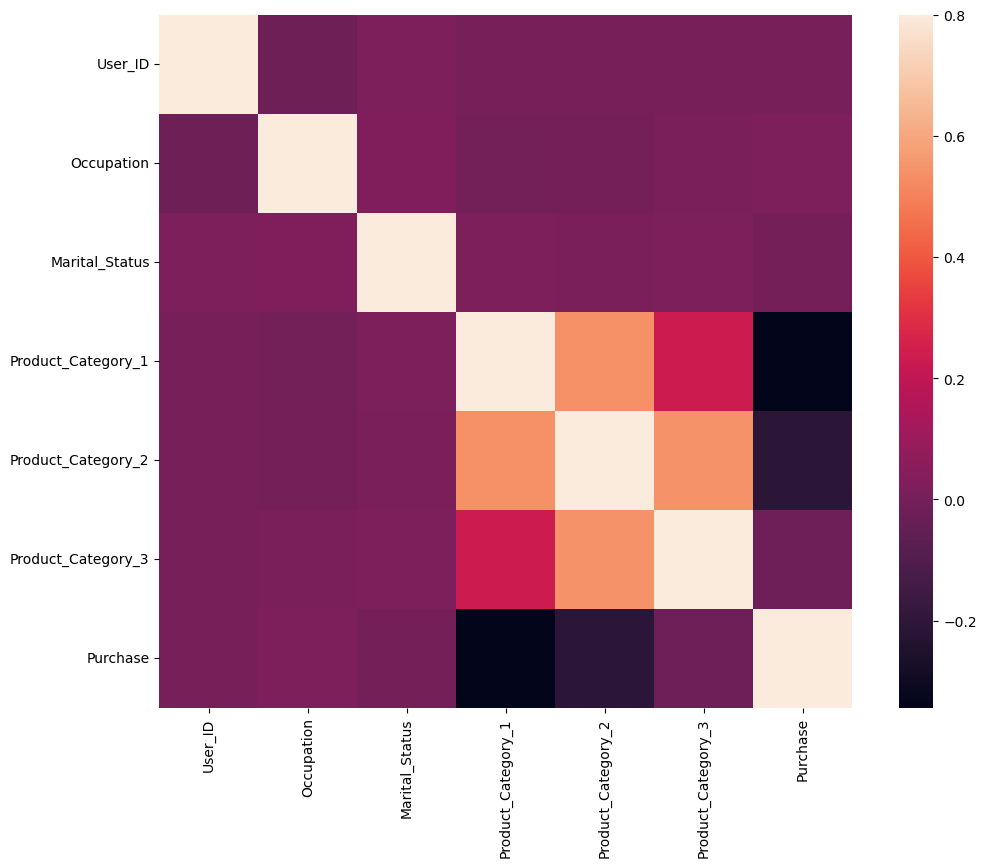

In [21]:
# Matriz de correlación:

corrmat = BlackFriday.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. Luego, observamos que no se tiene alguna variable cualitativa relevante que podamos usar para el analisis.

# Matriz de correlación de 'Purchase'

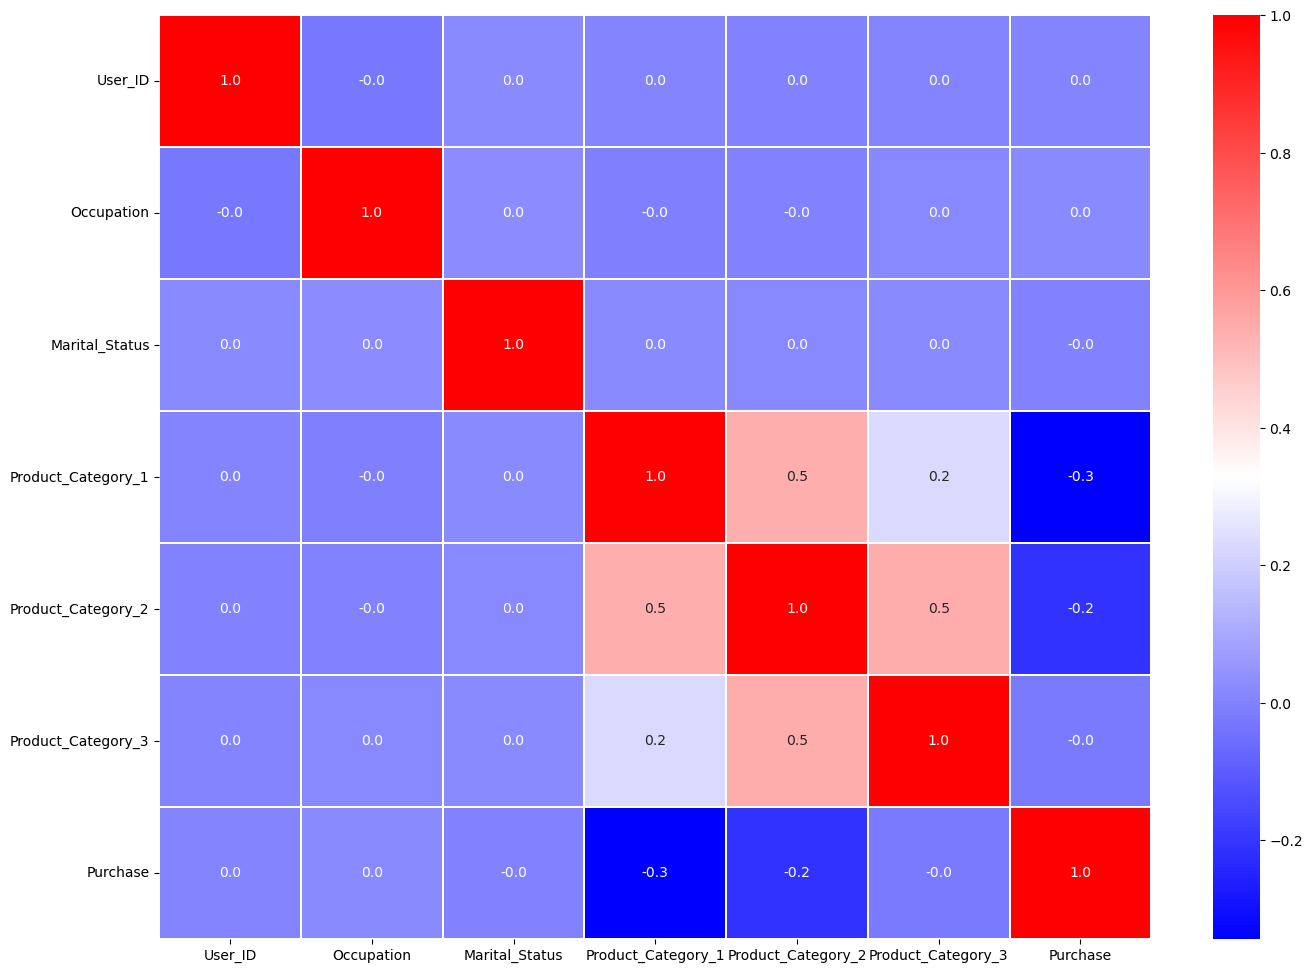

In [22]:
fig = plt.figure(figsize=(16,12)) 
sns.heatmap(corrmat,annot=corrmat,fmt='.1f',linewidth=0.2,cmap='bwr')
plt.show()

In [23]:
corr = BlackFriday.corr()
corr[['Purchase']].sort_values(by = 'Purchase',ascending = False).style.background_gradient()

C:\Users\sauls\AppData\Local\Temp\ipykernel_18484\215851871.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = BlackFriday.corr()


,Purchase
Purchase,1.000000
Occupation,0.020833
User_ID,0.004716
Marital_Status,-0.000463
Product_Category_3,-0.022006
Product_Category_2,-0.209918
Product_Category_1,-0.343703


En estas matrices de correlación se puede observar:

Que ninguna variable es digna, es decir, no tienen relación con el target 'Purchase'.

Diagramas de dispersión entre 'Purchase' y sus variables correlacionadas

# Scatter plot:
No se tiene variables cuantitativas relacionadas con el target 'Purchase'.

Aunque ya habíamos visto algunas de las figuras, este diagrama nos facilita una comprensión general sobre las relaciones entre las variables.

### Mapa de calor - heatmap

Los mapas de calor tienen gran número de aplicaciones en contexto de sistemas físicos, campo donde surgieron. Sin embargo en la actualidad y para nuestro proposito han encontrado una funcionalidad particular, analisis y representacion de correlaciones.

# ETAPA 5: Casos Atípicos Univariados y Multivariados

## Limpieza de datos

### Datos desaparecidos

Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.

In [24]:
# Missing data:

total = BlackFriday.isnull().sum().sort_values(ascending = False)
percent = (BlackFriday.isnull().sum() / BlackFriday.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(15)

,Total,Percent
Product_Category_3,383247,0.696727
Product_Category_2,173638,0.315666
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


Por razones prácticas voy a eliminar las variables con más de un 15% de datos faltantes (p.ej. 'PoolQC', 'MiscFeature', 'Alley', etc.); no creo que las echemos de menos, no parecen aspectos importantes a considerar al comprar una casa.

Con respecto a las variables 'GarageX', observo el mismo número de datos desaparecidos, hecho que quizás habría que estudiar con más detenimiento. Pero, dado que la información más relevante en cuanto al garaje ya está recogida por la variable 'GarageCars', y que sólo se trata de un 5% de datos faltantes, borraré las citadas variables 'GarageX', además de las 'BsmtX' bajo la misma lógica.

En cuanto a las variables 'MasVnrArea' y 'MasVnrType', se puede decir que no son esenciales y que, incluso, tienen una fuerte correlación con 'YearBuilt' y 'OverallQual'. No parece que se vaya a perder mucha información si elimino 'MasVnrArea' and 'MasVnrType'.

Para finalizar, encuentro un dato faltante en la variable 'Electrical'. Ya que sólo se trata de una observación, voy a borrarla y a mantener la variable.

En resumen, voy a borrar todas las variables con datos desaparecidos, excepto la variable 'Electrical'; en este caso sólo voy a borrar la observación con el dato faltante.

In [25]:
# Tratamiento de datos faltantes:

BlackFriday = BlackFriday.drop((missing_data[missing_data['Total'] > 1]).index,1)
BlackFriday.isnull().sum().max() # Para comprobar que no hay más datos desaparecidos.

C:\Users\sauls\AppData\Local\Temp\ipykernel_18484\3791896364.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  BlackFriday = BlackFriday.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

In [26]:
BlackFriday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

Sugerencia: eliminar cualquier variable adicional con un % de nulos mayor a 15% A lo demás, tratar los nulos como lo revisamos en el notebook anterior

### Datos atípicos

Los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento es un asunto complejo que requiere más atención; por ahora sólo voy a hacer un análisis rápido a través de la desviación estándar de la variable 'SalePrice' y a realizar un par de diagramas de dispersión.

## Creacion de nuevas variables

#Crearemos la variable (user Id + Product Id)

In [27]:
BlackFriday['userxproduct']=BlackFriday["User_ID"].astype(str) +'-'+ BlackFriday["Product_ID"]

In [28]:
BlackFriday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,userxproduct
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,1000001-P00069042
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,1000001-P00248942
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,1000001-P00087842
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,1000001-P00085442
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,1000002-P00285442


In [29]:
data= pd.get_dummies(BlackFriday, columns=['Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']) 
data.head()

,User_ID,Product_ID,Occupation,Marital_Status,Product_Category_1,Purchase,userxproduct,Age_0-17,Age_18-25,Age_26-35,...,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,10,0,3,8370,1000001-P00069042,1,0,0,...,1,0,1,0,0,0,0,1,0,0
1,1000001,P00248942,10,0,1,15200,1000001-P00248942,1,0,0,...,1,0,1,0,0,0,0,1,0,0
2,1000001,P00087842,10,0,12,1422,1000001-P00087842,1,0,0,...,1,0,1,0,0,0,0,1,0,0
3,1000001,P00085442,10,0,12,1057,1000001-P00085442,1,0,0,...,1,0,1,0,0,0,0,1,0,0
4,1000002,P00285442,16,0,8,7969,1000002-P00285442,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Occupation                     550068 non-null  int64 
 3   Marital_Status                 550068 non-null  int64 
 4   Product_Category_1             550068 non-null  int64 
 5   Purchase                       550068 non-null  int64 
 6   userxproduct                   550068 non-null  object
 7   Age_0-17                       550068 non-null  uint8 
 8   Age_18-25                      550068 non-null  uint8 
 9   Age_26-35                      550068 non-null  uint8 
 10  Age_36-45                      550068 non-null  uint8 
 11  Age_46-50                      550068 non-null  uint8 
 12  Age_51-55                      550068 non-nu

In [31]:
data = data.drop(["User_ID","Product_ID","userxproduct"],axis=1)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 21 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Occupation                     550068 non-null  int64
 1   Marital_Status                 550068 non-null  int64
 2   Product_Category_1             550068 non-null  int64
 3   Purchase                       550068 non-null  int64
 4   Age_0-17                       550068 non-null  uint8
 5   Age_18-25                      550068 non-null  uint8
 6   Age_26-35                      550068 non-null  uint8
 7   Age_36-45                      550068 non-null  uint8
 8   Age_46-50                      550068 non-null  uint8
 9   Age_51-55                      550068 non-null  uint8
 10  Age_55+                        550068 non-null  uint8
 11  Gender_F                       550068 non-null  uint8
 12  Gender_M                       550068 non-null  uint8
 13 

### Análisis univariable

La primera tarea en este caso es establecer un umbral que defina una observación como valor atípico. Para ello voy a estandarizar los datos, es decir, transformar los valores datos para que tengan una media de 0 y una desviación estándar de 1.

In [33]:
# Estandarización de datos:
from sklearn.preprocessing import StandardScaler

purchase_scaled = StandardScaler().fit_transform(data['Purchase'][:,np.newaxis]);
low_range = purchase_scaled[purchase_scaled[:,0].argsort()][:10]
high_range = purchase_scaled[purchase_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]
 [-1.8418986]]

Fuera de la distribución (por arriba):
[[2.92531422]
 [2.92551331]
 [2.92551331]
 [2.92571239]
 [2.92571239]
 [2.92571239]
 [2.92571239]
 [2.92591147]
 [2.92591147]
 [2.92591147]]


C:\Users\sauls\AppData\Local\Temp\ipykernel_18484\2248011382.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  purchase_scaled = StandardScaler().fit_transform(data['Purchase'][:,np.newaxis]);


Los valores bajos son similares y no muy alejados del 0.
Los valores altos están muy alejados del 0. Los valores superiores a 7 están realmente fuera de rango.

Análisis bivariable

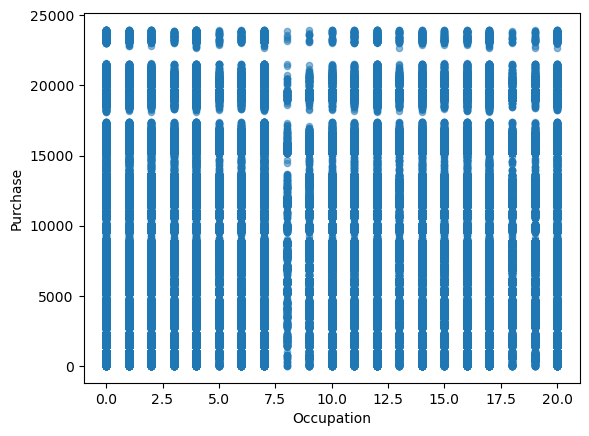

In [34]:
# Análisis bivariable SalePrice/GrLivArea:

var = 'Occupation'
datanew = pd.concat([data['Purchase'], data[var]], axis = 1)
datanew.plot.scatter(x = var, y = 'Purchase', alpha = 0.5)
plt.show()

En este diagrama de dispersión tomamos la variable 'Occupation', que aunque no cumple con el requisito corr>0.5, fue el unico que tenía correlación positiva (0.02), observamos que no se puede identificar outliers, por tanto optaremos por no eliminar registros de esta variable.

Vamos a hacer una función para la detección de Outliers, en este caso definimos como limite superior (e inferior) la media más (menos) 2 veces la desviación estándar que muchas veces es tomada como máximos de tolerancia.

In [35]:
anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(datanew):
    # Set upper and lower limit to 2 standard deviation
    data_std = datanew.std()
    data_mean = datanew.mean()
    anomaly_cut_off = data_std * 6   # podemos cambiar este corte
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    print(lower_limit.iloc[0])
    print(upper_limit.iloc[0])

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row # # obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

In [36]:
print(find_anomalies(data[['Purchase']]))

-20874.423649964636
39402.36107588289
[]


In [37]:
data.loc[anomalies]

,Occupation,Marital_Status,Product_Category_1,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+


De la funcion creada para detectar outliers en la data, observamos que no existen anomalias.

# Entrenamiento y validación

In [44]:
from sklearn.model_selection import train_test_split


In [45]:
X = data.drop(['Purchase'], axis=1)
y = data[['Purchase']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [47]:
X_train.head()

,Occupation,Marital_Status,Product_Category_1,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
362204,4,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0
355271,10,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
241276,1,0,5,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0
111691,7,0,5,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
45457,0,0,11,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0


In [48]:
X_test.head()

,Occupation,Marital_Status,Product_Category_1,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
343184,0,1,11,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0
544675,7,1,3,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
433588,3,0,5,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
123193,10,0,4,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0
161124,15,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0


In [49]:
X_train.shape, X_test.shape

((440054, 20), (110014, 20))

In [50]:
y_train.shape, y_test.shape

((440054, 1), (110014, 1))

In [51]:
y.mean(), y_train.mean(), y_test.mean()

(Purchase    9263.968713
 dtype: float64,
 Purchase    9270.83924
 dtype: float64,
 Purchase    9236.486729
 dtype: float64)

# Modelo

## Regresión Lineal

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
lr.intercept_

array([1.30353488e+15])

In [55]:
lr.coef_

array([[ 6.18535155e+00, -6.84518473e+01, -4.36899506e+02,
        -2.98794991e+14, -2.98794991e+14, -2.98794991e+14,
        -2.98794991e+14, -2.98794991e+14, -2.98794991e+14,
        -2.98794991e+14, -1.29381091e+13, -1.29381091e+13,
         8.12937653e+14,  8.12937653e+14,  8.12937653e+14,
        -1.80473944e+15, -1.80473944e+15, -1.80473944e+15,
        -1.80473944e+15, -1.80473944e+15]])

In [56]:
y_pred = lr.predict(X_test)

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mean_absolute_error(y_test, y_pred)

3598.6944707037287

In [58]:
mean_squared_error(y_test, y_pred)

22057638.887075737

In [59]:
r2_score(y_test, y_pred)

0.12606321768015472

In [60]:
from math import sqrt
print("RMSE del modelo de regresion es ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE del modelo de regresion es  4696.556066638163


## DecisionTreeRegressor

In [68]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)  

In [69]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [70]:
dt_y_pred = regressor.predict(X_test)

In [71]:
mean_absolute_error(y_test, dt_y_pred)

2173.853519681073

In [72]:
mean_squared_error(y_test, dt_y_pred)

8862859.091440577

In [73]:
r2_score(y_test, dt_y_pred)

0.6488482472588604

In [74]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Linear Regression Model is  2977.055439766041


## Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(random_state = 0) 

In [76]:
RFregressor.fit(X_train, y_train)

C:\Users\sauls\AppData\Local\Temp\ipykernel_18484\182287466.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFregressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [77]:
rf_y_pred = RFregressor.predict(X_test)

In [78]:
mean_absolute_error(y_test, rf_y_pred)

2163.6625822145897

In [79]:
mean_squared_error(y_test, rf_y_pred)

8689335.213261742

In [80]:
r2_score(y_test, rf_y_pred)

0.6557233666008552

In [81]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of Linear Regression Model is  2947.767835712599


## XGBoost Regressor

In [92]:
pip install xgboost

     --------------------------------------- 70.9/70.9 MB 31.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [93]:
from xgboost.sklearn import XGBRegressor

In [94]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [95]:
xgb_y_pred = xgb_reg.predict(X_test)

In [96]:
mean_absolute_error(y_test, xgb_y_pred)

2182.691454514373

In [97]:
mean_squared_error(y_test, xgb_y_pred)

8610561.14716599

In [98]:
r2_score(y_test, xgb_y_pred)

0.6588444419891331

In [99]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of Linear Regression Model is  2934.375767887608
